# Exploratory Data Analysis
### Census of ground floor stores in Barcelona, 2019

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

import geopandas

In [31]:
data = pd.read_csv('./data/2019_censcomercialbcn_detall.csv')
print(data.shape)
data.head()

(80554, 49)


/home/antonia/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID_Bcn_2019,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2019,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_cadastral,Data_Revisio
0,1075454,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
1,1075453,NaN,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
2,1075451,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
3,1075449,NaN,1,Actiu,3,Altres,17,Altres,1700100,Administració,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
4,1075448,NaN,1,Actiu,2,Serveis,16,Altres,1600101,Activitats de transport,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0


## Missing values

- *ID_Bcn_2016* is the store code for the 2016 dataset. The stores that doesn't have this code have probably opened after 2016.
- *Nom_Mercat* is the name of the food market where the store is located. A lot of stores are not inside food markets, that's why this column has so many missing values.
- *Nom_Galeria*, *Nom_CComercial* and *Nom_Eix* are, respectively, the name of the shopping arcade, shopping mall or shopping district where the store is located. These can be explained like the *Nom_Mercat* column.
- Some street numbers have also letters, but many others don't, that's why *Lletra inicial* and *LLetra final* have so many missing values.

<AxesSubplot:>

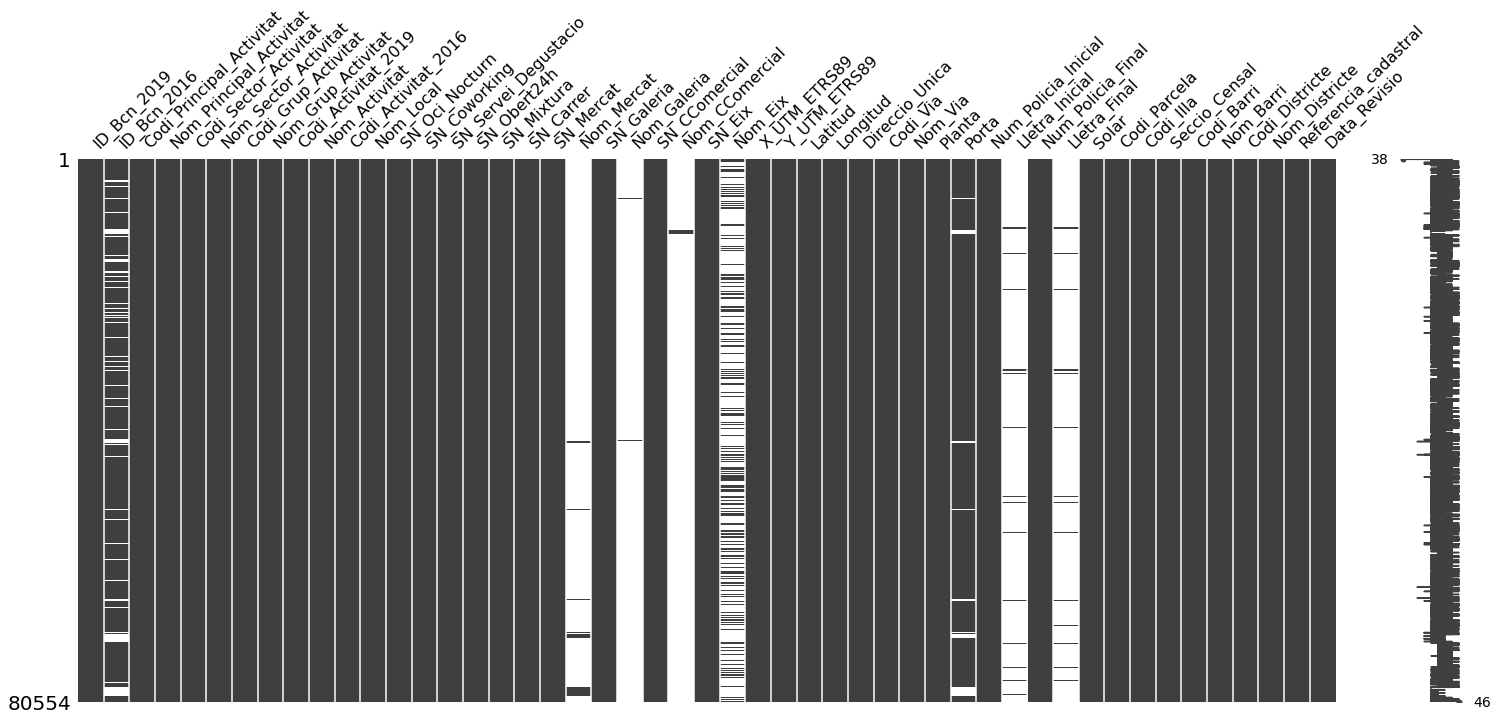

In [32]:
import missingno as msno
msno.matrix(data)

## Distribution of stores by activity

1. Let's see first the distribution by **activity sectors** (Services, retail, wholesale...)

In [128]:
def countplot_var(df, var, figsize=(12,8)):
    order_columns = df[var].value_counts(normalize=True).sort_values(ascending=False).index
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(y=var, data=df, ax=ax, order=order_columns)
    print(df[var].value_counts(normalize=True).sort_values(ascending=False))

Serveis                                              0.414654
Comerç al detall                                     0.264742
Sense informació                                     0.138590
Altres                                               0.076321
Sense informació - Havia tingut activitat (rètol)    0.053082
Locals buits en lloguer                              0.017330
En reforma                                           0.011843
Comerç al detall /Engròs                             0.008466
Locals buits en venda                                0.007970
Locals buits en venda i lloguer                      0.007002
Name: Nom_Sector_Activitat, dtype: float64


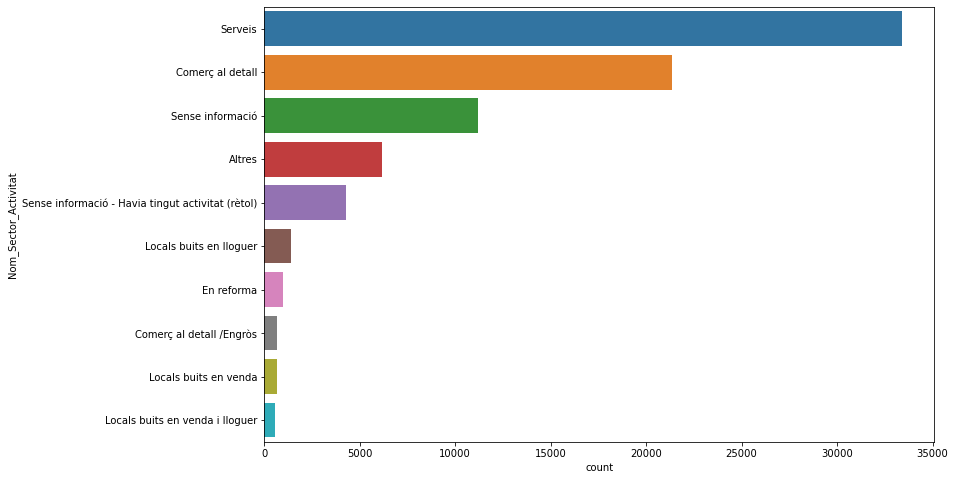

In [129]:
countplot_var(data, 'Nom_Sector_Activitat')

In [35]:
columns_empty_stores = ['Locals buits en venda', 'Locals buits en venda i lloguer', 'Locals buits en lloguer', 'Sense informació - Havia tingut activitat (rètol)']
ratio_empty_stores = data['Nom_Sector_Activitat'].value_counts(normalize=True).loc[columns_empty_stores].sum()

print(f'The ratio of empty stores in Barcelona is {ratio_empty_stores:.2f}')

The ratio of empty stores in Barcelona is 0.09


- About a 41% of the stores in Barcelona work in the services sector (*Serveis*)
- 26% of the stores are retail stores (*Comerç al detail*)
- Less than 1% of the stores work as retail and wholesale shops
- A 9% of the stores are empty (for sale or rent, or with a sign from the previous business)

Let's see what are those **services** stores:

Restaurants                                                       0.167625
Serveis a les empreses i oficines                                 0.103706
Bars   / CIBERCAFÈ                                                0.098497
Perruqueries                                                      0.079606
Ensenyament                                                       0.063320
Sanitat i assistència                                             0.060595
Centres d'estètica                                                0.044878
Activitats emmagatzematge                                         0.043171
Reparacions (Electrodomèstics i automòbils)                       0.042063
Finances i assegurances                                           0.037183
Equipaments culturals i recreatius                                0.031046
Activitats immobiliàries                                          0.028441
Serveis de menjar take away MENJAR RÀPID                          0.027813
serveis d'allotjament    

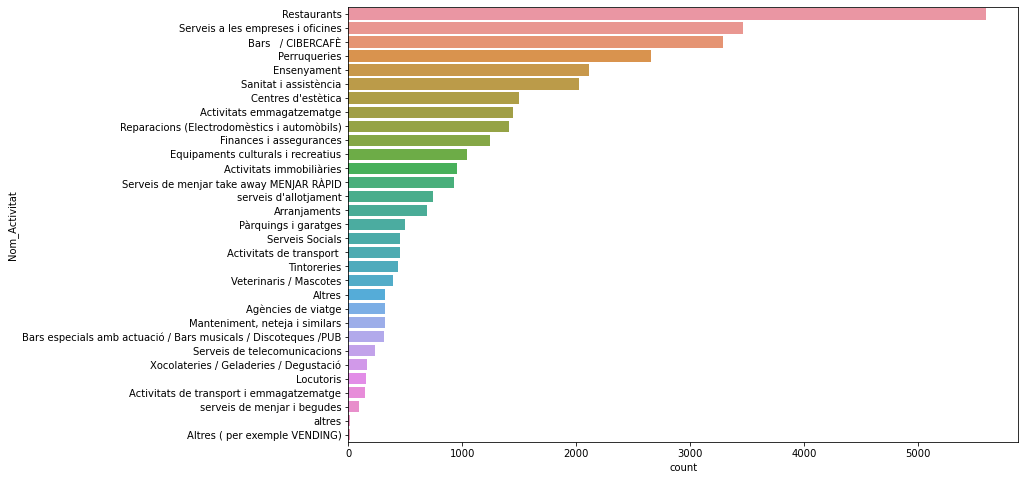

In [136]:
countplot_var(data[data['Nom_Sector_Activitat'] == 'Serveis'], 'Nom_Activitat')

And the retail stores group consists on:

Vestir                              0.148035
Autoservei / Supermercat            0.109585
Pa, pastisseria i làctics           0.073244
Farmàcies PARAFARMÀCIA              0.050924
Carn i Porc                         0.050127
Fruites i verdures                  0.047876
Material equipament llar            0.045297
Calçat i pell                       0.037888
Joieria, rellotgeria i bijuteria    0.034277
Informàtica                         0.032402
Altres                              0.031980
Drogueria i perfumeria              0.031886
Mobles i articles fusta i metall    0.026071
Basars                              0.025978
Peix i marisc                       0.023399
Llibres, diaris i revistes          0.021242
Joguines i esports                  0.019647
Tabac i articles fumadors           0.019554
Vehicles                            0.018100
Souvenirs                           0.016177
Herbolaris, dietètica i NUTRICIÓ    0.015802
Òptiques                            0.015380
Parament f

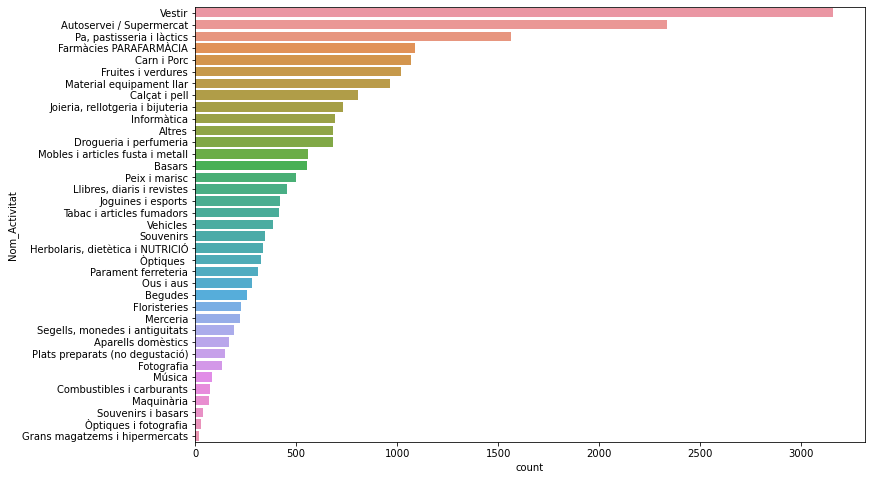

In [134]:
countplot_var(data[data['Nom_Sector_Activitat'] == 'Comerç al detall'], 'Nom_Activitat')

2. Now, let's plot the distribution of the **groups of activities** (restaurants, grocery shops, leisure)

Altres                                                            0.266852
Grup no definit                                                   0.235817
Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)    0.138503
Quotidià alimentari                                               0.097450
Equipament personal                                               0.061052
Quotidià no alimentari                                            0.032177
Parament de la llar                                               0.030054
Ensenyament                                                       0.026256
Sanitat i assistència                                             0.025126
Oci i cultura                                                     0.020409
Reparacions (Electrodomèstics i automòbils)                       0.017442
Finances i assegurances                                           0.015418
Equipaments culturals i recreatius                                0.012873
Activitats immobiliàries 

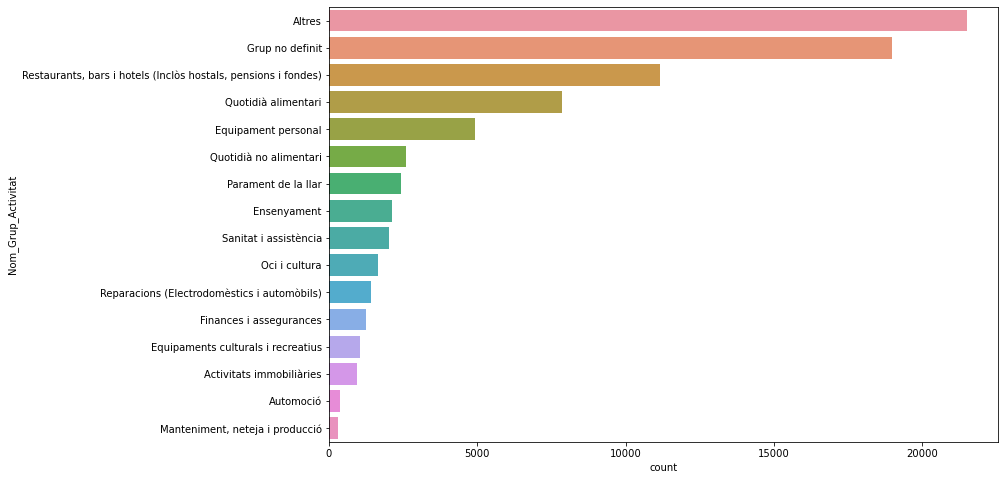

In [36]:
countplot_var(data, 'Nom_Grup_Activitat')

- Restaurants, bars and hotels are the more populated group, with a 14% (after non-defined activity group, *Altres* and *Grup no definit*)
- Grocery shops (*Quotidià alimentari*): 9.7%
- Personal apparel shops (*Equipament personal*) are a 6.1% of the stores
- After that: 
    - daily shops (*Quotidià no alimentari*): 3.2%
    - household goods shops (*Parament de la llar*): 3%
    - education (*Ensenyament*): 2.6%
    - healthcare (*Sanitat i assistencia*): 2.5%
    - leisure and culture (*Oci i cultura*): 2%
    - repairs (*Reparacions (Electrodomèstics i automóbils)*): 1.7%
    - finances and insurers (*Finances i assegurances*): 1.5&
    - leisure and cultural equipments (*Equipaments culturals i recreatius*): 1.3%
    - real state activities (*Activitats inmobiliàries*): 1.2%
    - automotive (*Automoció*):0.5%
    - maintenance and cleaning (*Manteniment, neteja i producció*): 0.4%
    

3. Plot the group *Altres* (others) and *Grup no definit* (group undefined), to see what is there

Serveis a les empreses i oficines           0.161146
Perruqueries                                0.123697
Activitats de la construcció                0.091412
Centres d'estètica                          0.069734
Activitats emmagatzematge                   0.067082
Altres                                      0.064710
Associacions                                0.044287
Activitats industrials                      0.033122
Arranjaments                                0.032192
Arts gràfiques                              0.029866
Basars                                      0.025772
Pàrquings i garatges                        0.022981
Serveis Socials                             0.020934
Activitats de transport                     0.020841
Tintoreries                                 0.020097
Equipaments religiosos                      0.018282
Veterinaris / Mascotes                      0.018236
Administració                               0.016794
Souvenirs                                   0.

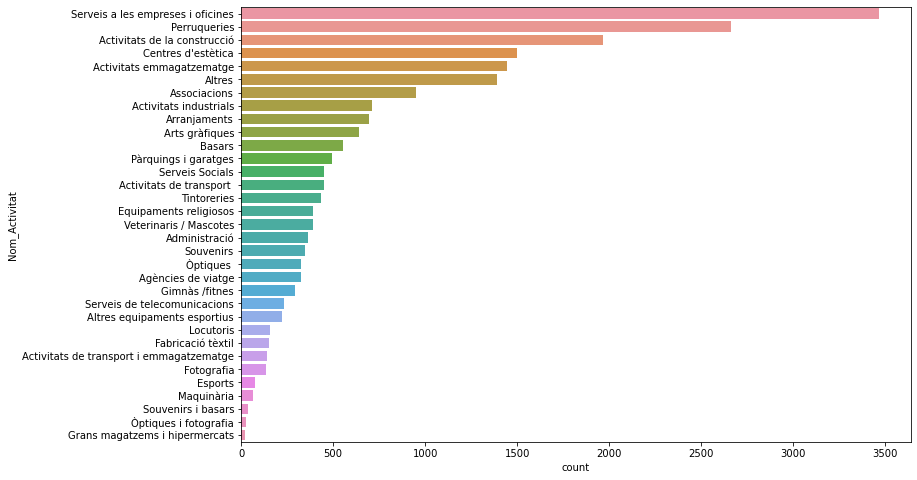

In [37]:
countplot_var(data[data['Nom_Grup_Activitat'] == 'Altres'], 'Nom_Activitat')

Sense informació                                     0.587703
Sense informació - Havia tingut activitat (rètol)    0.225100
Locals buits en lloguer                              0.073489
En reforma                                           0.050221
Locals buits en venda                                0.033797
Locals buits en venda i lloguer                      0.029690
Name: Nom_Activitat, dtype: float64


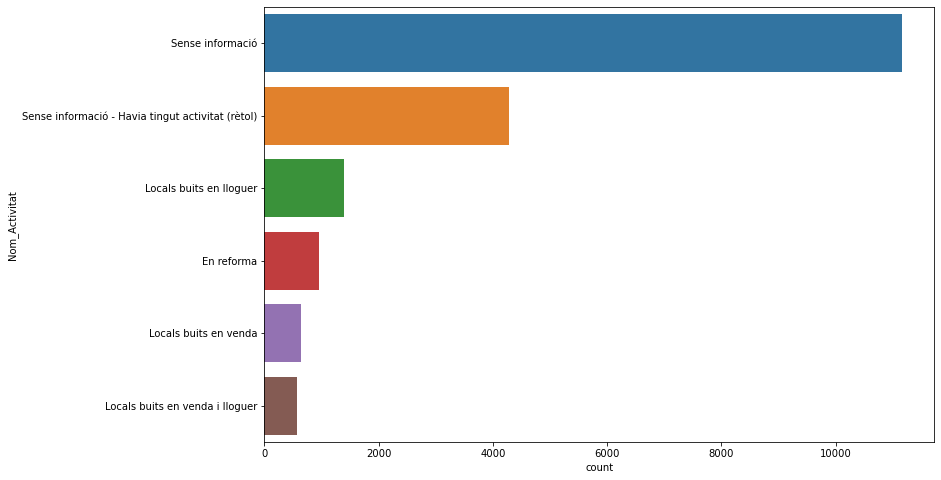

In [38]:
countplot_var(data[data['Nom_Grup_Activitat'] == 'Grup no definit'], 'Nom_Activitat')

4. Now, I'm going to plot the distribution of activities related to grocery shops

Autoservei / Supermercat           0.297707
Pa, pastisseria i làctics          0.198981
Carn i Porc                        0.136178
Fruites i verdures                 0.130064
Altres                             0.086879
Peix i marisc                      0.063567
Ous i aus                          0.035669
Begudes                            0.032357
Plats preparats (no degustació)    0.018599
Name: Nom_Activitat, dtype: float64


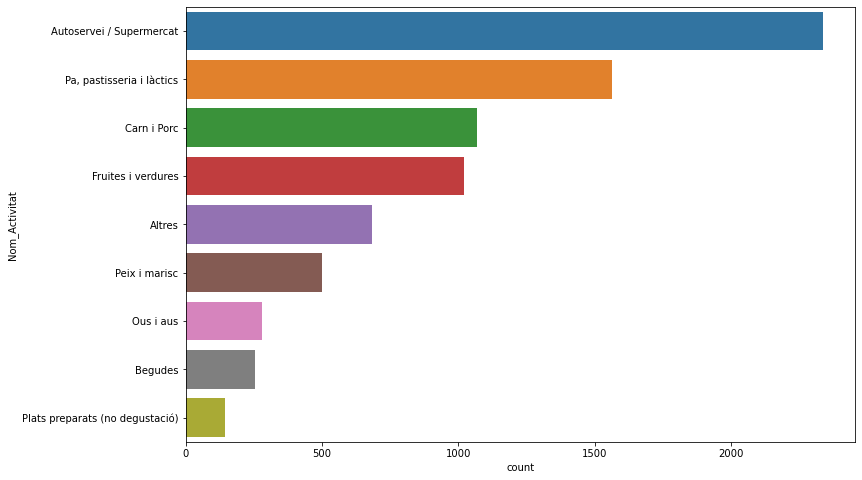

In [39]:
countplot_var(data[data['Nom_Grup_Activitat'] == 'Quotidià alimentari'], 'Nom_Activitat')

5. And, finally, let's plot now the distribution of activities related to hotels, bars and restaurants

Restaurants                                                       0.501837
Bars   / CIBERCAFÈ                                                0.294882
Serveis de menjar take away MENJAR RÀPID                          0.083266
serveis d'allotjament                                             0.066326
Bars especials amb actuació / Bars musicals / Discoteques /PUB    0.028233
Xocolateries / Geladeries / Degustació                            0.014699
serveis de menjar i begudes                                       0.007887
Altres ( per exemple VENDING)                                     0.001434
altres                                                            0.001434
Name: Nom_Activitat, dtype: float64


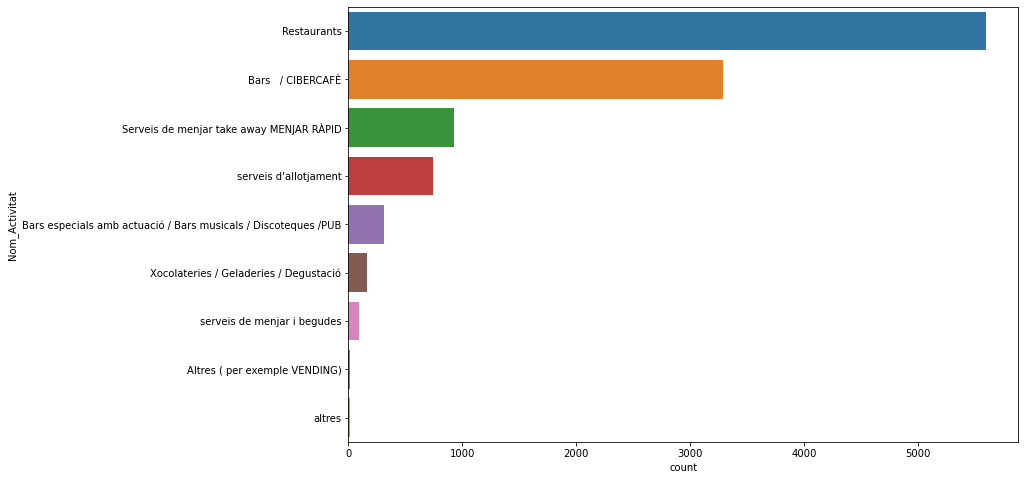

In [40]:
countplot_var(data[data['Nom_Grup_Activitat'] == 'Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)'], 'Nom_Activitat')

## Distribution of stores by neighbourhood and district

By neighbourhood:

la Vila de Gràcia                  0.055329
la Dreta de l'Eixample             0.053120
Sant Gervasi - Galvany             0.039725
l'Antiga Esquerra de l'Eixample    0.037043
el Raval                           0.036845
                                     ...   
Baró de Viver                      0.000956
Can Peguera                        0.000546
Torre Baró                         0.000459
Vallbona                           0.000335
la Clota                           0.000248
Name: Nom_Barri, Length: 73, dtype: float64


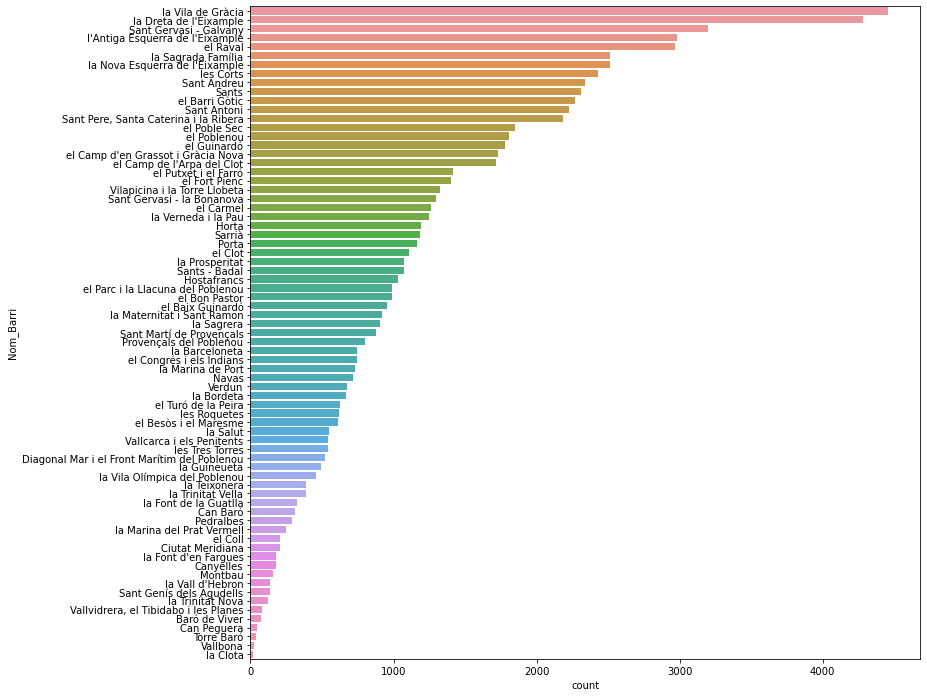

In [41]:
countplot_var(data, 'Nom_Barri', figsize=(12,12))

Eixample               0.197557
Sant Martí             0.125791
Sants-Montjuïc         0.102217
Ciutat Vella           0.101373
Sarrià-Sant Gervasi    0.095812
Gràcia                 0.092907
Nou Barris             0.081846
Horta-Guinardó         0.080865
Sant Andreu            0.076458
Les Corts              0.045175
Name: Nom_Districte, dtype: float64


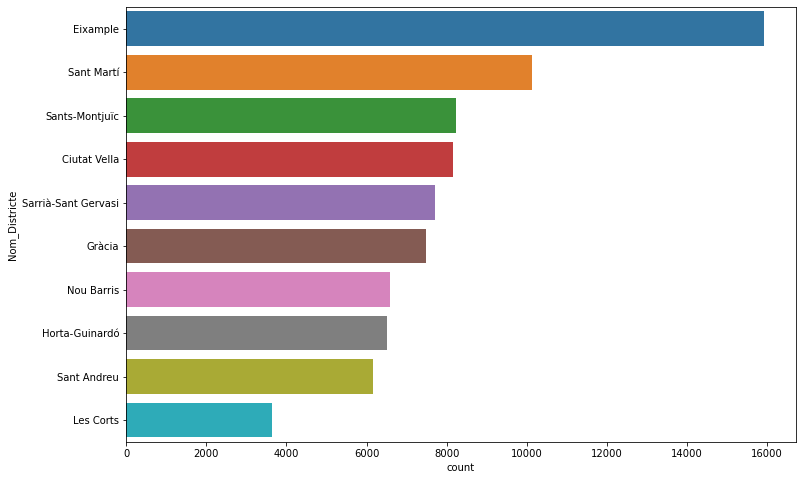

In [115]:
countplot_var(data, 'Nom_Districte')

The center districts are the ones witht the largest number of stores: Eixample, Sant Martí, Sants-Montjuic, Ciutat Vella

Let's see how are the activities distributed in the Eixample district

Altres                                                            0.266244
Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)    0.195677
Grup no definit                                                   0.119957
Quotidià alimentari                                               0.102488
Equipament personal                                               0.080558
Parament de la llar                                               0.043295
Quotidià no alimentari                                            0.035943
Oci i cultura                                                     0.030916
Sanitat i assistència                                             0.026518
Ensenyament                                                       0.020485
Finances i assegurances                                           0.019605
Reparacions (Electrodomèstics i automòbils)                       0.017155
Equipaments culturals i recreatius                                0.015584
Activitats immobiliàries 

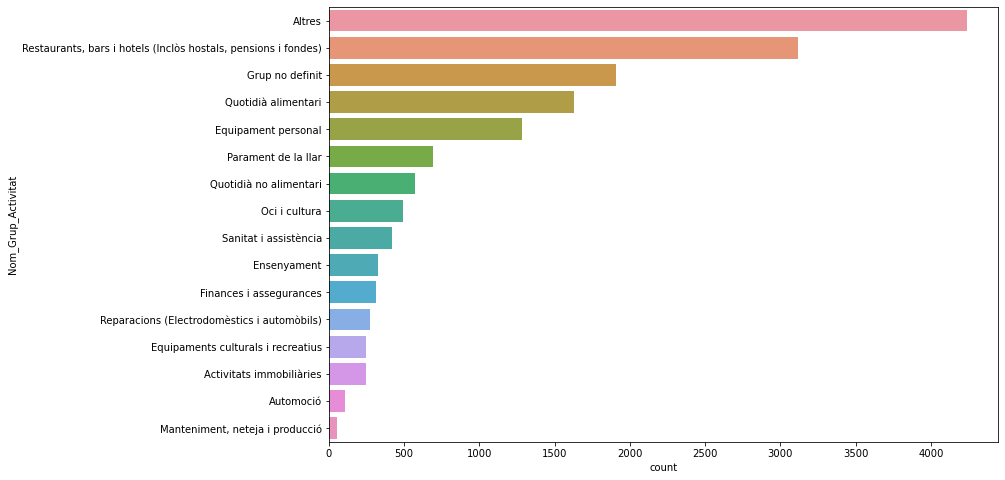

In [43]:
countplot_var(data[data['Nom_Districte'] == 'Eixample'], 'Nom_Grup_Activitat')

Let's see how restaurants, cafeterias and hotels are distributed in the Eixample district:

Restaurants                                                       0.493577
Bars   / CIBERCAFÈ                                                0.302184
serveis d'allotjament                                             0.083815
Serveis de menjar take away MENJAR RÀPID                          0.062620
serveis de menjar i begudes                                       0.024727
Bars especials amb actuació / Bars musicals / Discoteques /PUB    0.019268
Xocolateries / Geladeries / Degustació                            0.011882
altres                                                            0.001927
Name: Nom_Activitat, dtype: float64


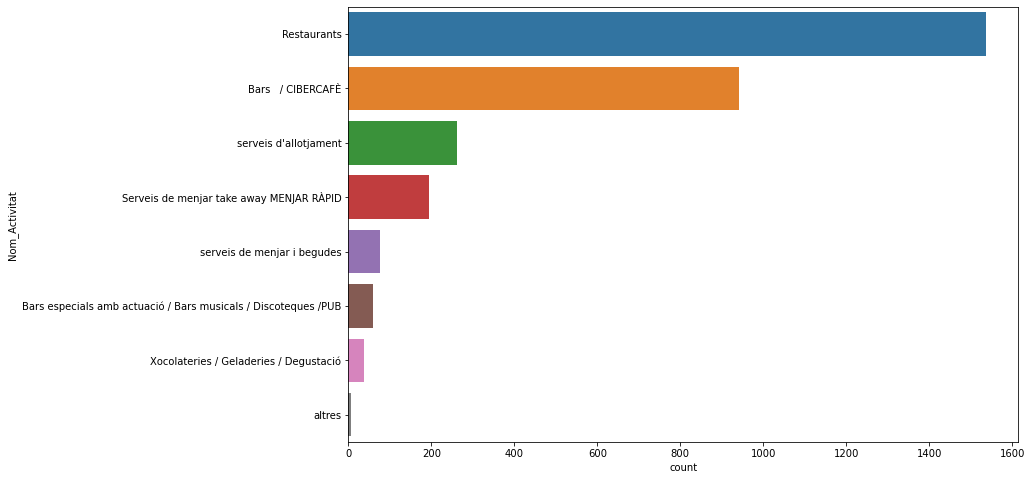

In [131]:
countplot_var(data[(data['Nom_Districte'] == 'Eixample') 
                   & (data['Nom_Grup_Activitat'] == 'Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)')],
              'Nom_Activitat')

## Maps

First, I'm going to map the districts of Barcelona

In [103]:
geo_districts_barcelona = geopandas.read_file("./data/districts.geojson")
geo_districts_barcelona.drop(geo_districts_barcelona.columns.difference(['NOM', 'geometry']), axis=1, inplace=True)
print(geo_districts_barcelona.crs)
geo_districts_barcelona.head(2)

epsg:4326


,NOM,geometry
0,Ciutat Vella,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,Eixample,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ..."


In [104]:
# first, find the centroid for every district, to be able to label the districts
geo_districts_barcelona['coords'] = geo_districts_barcelona['geometry'].apply(lambda x: x.representative_point().coords[:])
geo_districts_barcelona['coords'] = [coords[0] for coords in geo_districts_barcelona['coords']]

In [105]:
# then, reorder the districts by the quantity of stores in them
order_columns = data['Nom_Districte'].value_counts(normalize=True).sort_values(ascending=False).index
geo_districts_barcelona = geo_districts_barcelona.set_index('NOM').loc[order_columns].reset_index().rename(columns={'index':'NOM'})

In [120]:
geo_districts_barcelona = geo_districts_barcelona.replace({'Eixample':'01.Eixample', 'Sant Martí':'02.Sant Martí', 'Sants-Montjuïc':'03.Sants-Montjuïc',
                                'Ciutat Vella': '04.Ciutat Vella', 'Sarrià-Sant Gervasi':'05.Sarrià-Sant Gervasi',
                                'Gràcia':'06.Gràcia', 'Nou Barris':'07.Gràcia', 'Horta-Guinardó':'08.Horta-Guinardó',
                                'Sant Andreu': '09.Sant Andreu', 'Les Corts':'10.Les Corts'})

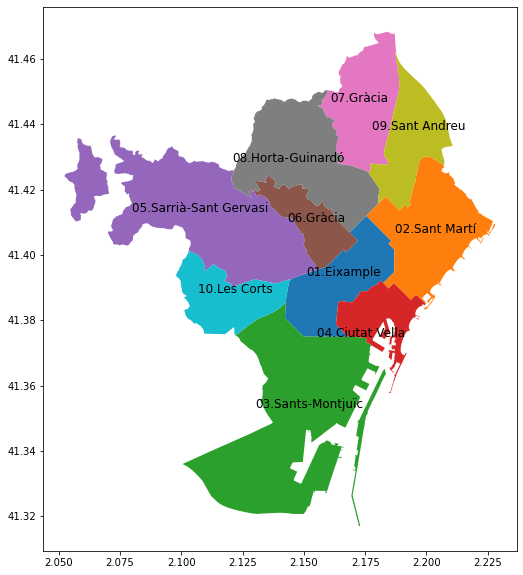

In [123]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')

geo_districts_barcelona.plot(column='NOM', ax=ax, cmap='tab10')
for idx, row in geo_districts_barcelona.iterrows():
    plt.annotate(text=row['NOM'], xy=row['coords'], color='k', fontsize='large',fontweight='normal',
                 horizontalalignment='center')    

plt.show()

Then, I'm going to plot all the stores in Barcelona over the neighbourhoods

In [47]:
geo_barcelona = geopandas.read_file("./data/neighborhoods.geojson")
geo_barcelona.drop(geo_barcelona.columns.difference(['NOM', 'geometry']), axis=1, inplace=True)
print(geo_barcelona.crs)
geo_barcelona.head()

epsg:4326


,NOM,geometry
0,el Raval,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
1,el Barri Gòtic,"POLYGON ((2.17701 41.38525, 2.17873 41.38396, ..."
2,la Barceloneta,"POLYGON ((2.19623 41.38745, 2.19631 41.38745, ..."
3,la Dreta de l'Eixample,"POLYGON ((2.17091 41.40182, 2.17221 41.40083, ..."
4,l'Antiga Esquerra de l'Eixample,"POLYGON ((2.15736 41.39331, 2.15847 41.39245, ..."


The name of the neighbourhood "El Poble Sec" is spelled differently in the geojson, so I'm going to change it:

In [48]:
geo_barcelona = geo_barcelona.replace('el Poble-sec', 'el Poble Sec')

In [49]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(data['Longitud'], data['Latitud'])]
crs = {'init': 'epsg:4326'} 
geo_stores = geopandas.GeoDataFrame(data, crs=geo_barcelona.crs, geometry=geometry)

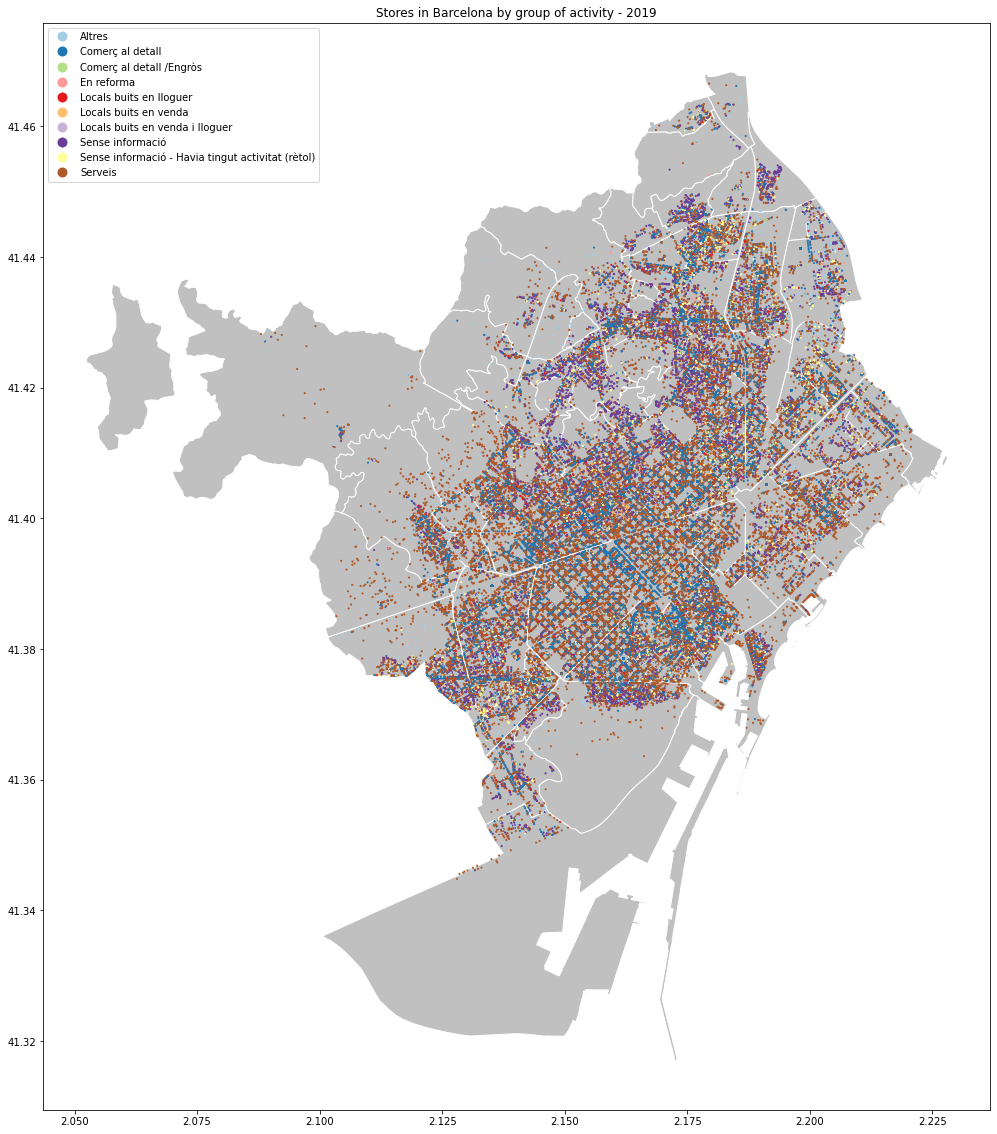

In [137]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')

geo_barcelona.plot(color='silver', edgecolor='white',ax=ax)
geo_stores.plot(ax=ax, column='Nom_Sector_Activitat', marker = '.', markersize=5, legend=True, cmap='Paired')
plt.title('Stores in Barcelona by group of activity - 2019')

plt.show()

Now I want to see where the **empty stores** are

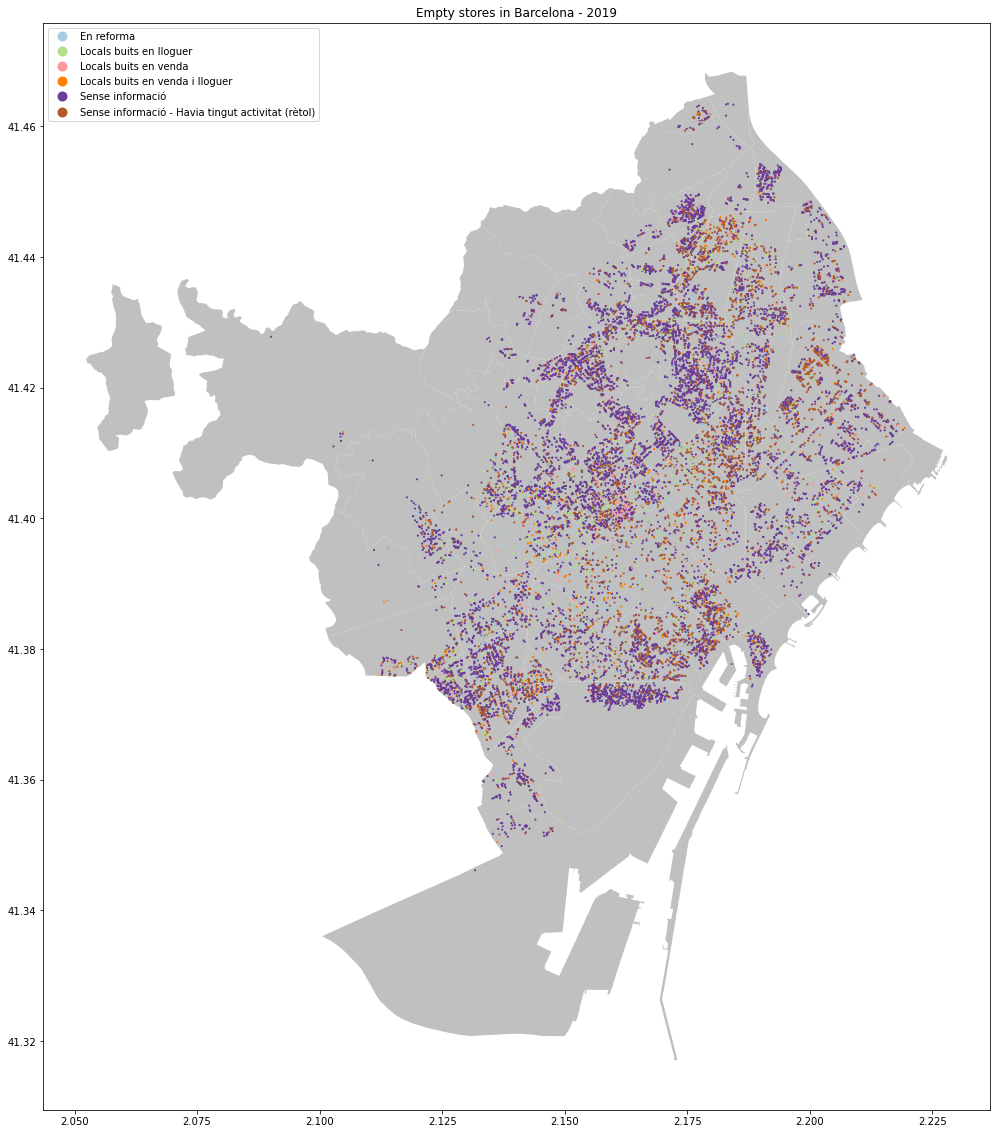

In [62]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')

geo_barcelona.plot(color='silver', ax=ax)
geo_stores[geo_stores['Nom_Grup_Activitat'] == 'Grup no definit'].plot(ax=ax, column='Nom_Sector_Activitat', marker = '.', markersize=5, legend=True, cmap='Paired')
plt.title('Empty stores in Barcelona - 2019')

plt.show()

These maps are not very clear, so let's load a cleaned dataset with the ratio of each activity group in every neighbourhood 

In [24]:
activity_groups = pd.read_csv('./data/cleaned/activity_groups_by_neighbourhood.csv')
print(activity_groups.shape)
activity_groups.head()

(73, 17)


,Nom_Barri,Activitats immobiliàries,Altres,Automoció,Ensenyament,Equipament personal,Equipaments culturals i recreatius,Finances i assegurances,Grup no definit,"Manteniment, neteja i producció",Oci i cultura,Parament de la llar,Quotidià alimentari,Quotidià no alimentari,Reparacions (Electrodomèstics i automòbils),"Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)",Sanitat i assistència
0,Baró de Viver,0,11,0,4,0,3,0,44,0,0,1,5,2,0,6,1
1,Can Baró,0,63,0,3,2,2,1,171,0,2,2,24,11,7,19,2
2,Can Peguera,0,9,0,3,0,2,0,23,0,0,0,1,2,0,2,2
3,Canyelles,1,23,1,5,2,2,3,69,1,0,1,34,9,5,18,1
4,Ciutat Meridiana,1,37,0,6,5,1,8,78,0,3,3,30,7,3,18,3


Let's merge this with the geojson for Barcelona:

In [25]:
merged = geo_barcelona.merge(activity_groups, right_on='Nom_Barri', left_on='NOM', how='right')
merged = merged.drop(columns=['NOM'])
merged.head(2)

,geometry,Nom_Barri,Activitats immobiliàries,Altres,Automoció,Ensenyament,Equipament personal,Equipaments culturals i recreatius,Finances i assegurances,Grup no definit,"Manteniment, neteja i producció",Oci i cultura,Parament de la llar,Quotidià alimentari,Quotidià no alimentari,Reparacions (Electrodomèstics i automòbils),"Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)",Sanitat i assistència
0,"POLYGON ((2.19664 41.44257, 2.19560 41.44249, ...",Baró de Viver,0,11,0,4,0,3,0,44,0,0,1,5,2,0,6,1
1,"POLYGON ((2.16617 41.42002, 2.16617 41.41993, ...",Can Baró,0,63,0,3,2,2,1,171,0,2,2,24,11,7,19,2


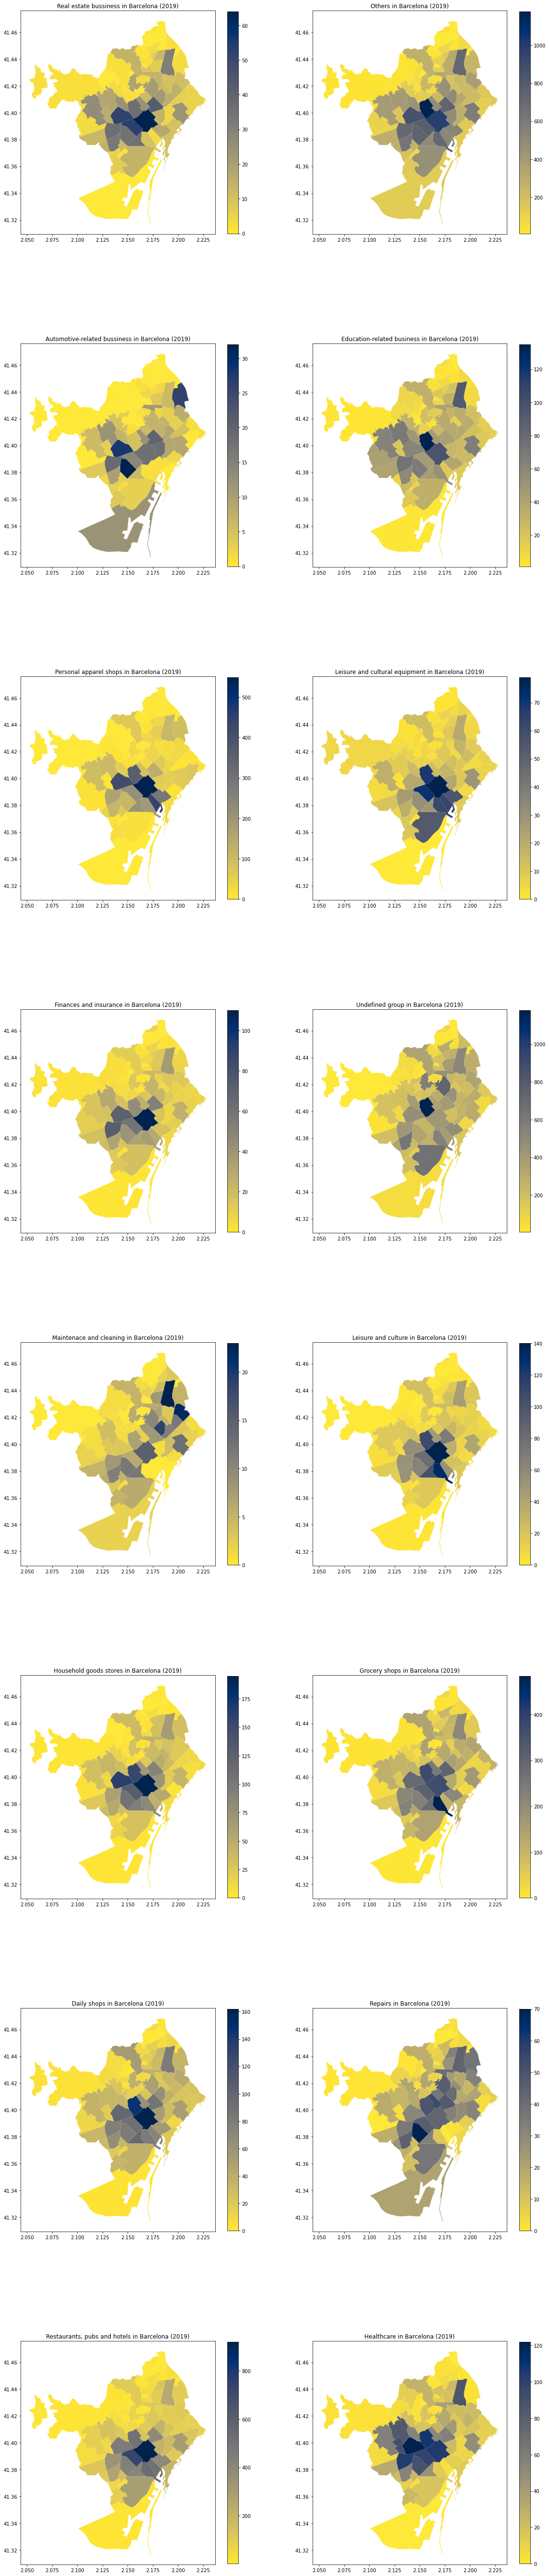

In [89]:
variables = activity_groups.columns.drop('Nom_Barri')
titles = ['Real estate bussiness', 'Others', 'Automotive-related bussiness', 'Education-related business',
         'Personal apparel shops', 'Leisure and cultural equipment', 'Finances and insurance', 'Undefined group',
         'Maintenace and cleaning', 'Leisure and culture', 'Household goods stores', 'Grocery shops',
         'Daily shops', 'Repairs', 'Restaurants, pubs and hotels', 'Healthcare']

fig = plt.figure(figsize=(20, 100))

n_cols = 2
n_rows = int(np.ceil(len(variables)/ n_cols))

for i, var in enumerate(variables):
    ax = fig.add_subplot(n_rows,n_cols,i + 1)
    ax.set_aspect('equal')
    
    merged.plot(column=var, legend=True, ax=ax, cmap='cividis_r',legend_kwds={'shrink': 0.8, }) 
    plt.title(f'{titles[i]} in Barcelona (2019)')
    